In [1]:
from pycaret.classification import *
import pandas as pd

In [3]:
df = pd.read_csv("../features.csv")
df.head()
#df = df[df["label"] != "~"]


,rr_peaks_count,min_rate,avg_rate,std_rate,max_rate,sdnn,nn50,sdsd,rmssd,low_freq_power_perc,high_freq_power_perc,freq_power_ratio,label
0,24.0,49.862263,51.636793,0.876725,53.219532,7.716794,0.0,5.441024,7.183919,0.309650,0.000297,1043.553581,N
1,31.0,61.558096,64.505632,3.722689,73.888917,15.844405,0.0,6.306446,7.507774,0.196235,0.000080,2452.646909,N
2,66.0,57.130514,83.328442,5.411733,88.380180,27.707989,2.0,22.735223,27.533476,0.098087,0.000094,1041.473061,O
3,29.0,56.324829,59.267802,1.306788,61.161946,8.466829,0.0,4.312373,7.083683,0.128914,0.000155,831.827235,N
4,48.0,91.852722,103.903211,3.133816,114.322251,35.679716,17.0,25.502118,61.323870,0.097419,0.000121,802.359279,O


In [7]:
df.columns

Index(['rr_peaks_count', 'min_rate', 'avg_rate', 'std_rate', 'max_rate',
       'sdnn', 'nn50', 'sdsd', 'rmssd', 'low_freq_power_perc',
       'high_freq_power_perc', 'freq_power_ratio', 'label'],
      dtype='object')

<AxesSubplot:>

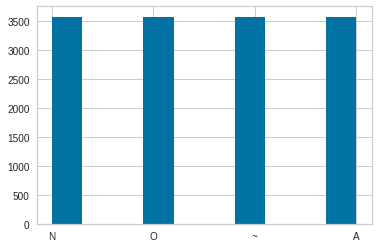

In [4]:
df.label.hist()

In [5]:
config = setup( data = df,
                train_size=0.8,
                target="label",
                use_gpu=True,
                feature_selection=True,
                feature_ratio=True,
                session_id=123)

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"A: 0, N: 1, O: 2, ~: 3"
4,Original Data,"(14324, 13)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model = compare_models(sort = "F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9007,0.9833,0.9013,0.8996,0.8991,0.8676,0.8683,0.6930
lightgbm,Light Gradient Boosting Machine,0.8967,0.9799,0.8973,0.8955,0.8950,0.8623,0.8629,0.5820
rf,Random Forest Classifier,0.8936,0.9804,0.8942,0.8922,0.8919,0.8582,0.8588,0.9620
gbc,Gradient Boosting Classifier,0.8417,0.9608,0.8424,0.8389,0.8383,0.7890,0.7902,18.0870
dt,Decision Tree Classifier,0.8233,0.8821,0.8239,0.8221,0.8223,0.7644,0.7646,0.2260
knn,K Neighbors Classifier,0.8177,0.9484,0.8187,0.8129,0.8114,0.7570,0.7594,0.4300
ada,Ada Boost Classifier,0.7330,0.8844,0.7341,0.7302,0.7264,0.6441,0.6472,1.0720
qda,Quadratic Discriminant Analysis,0.7339,0.9129,0.7352,0.7381,0.7239,0.6454,0.6524,0.0340
lda,Linear Discriminant Analysis,0.7173,0.8934,0.7181,0.7158,0.7158,0.6230,0.6234,0.0590
lr,Logistic Regression,0.7230,0.8954,0.7242,0.7169,0.7123,0.6308,0.6355,4.6570


In [8]:
tuned_model = tune_model(best_model, optimize='F1', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9598,0.8342,0.8290,0.8280,0.7778,0.7798
1,0.8543,0.9712,0.8550,0.8523,0.8511,0.8057,0.8071
2,0.8551,0.9668,0.8559,0.8524,0.8511,0.8069,0.8086
3,0.8464,0.9654,0.8473,0.8470,0.8413,0.7953,0.7985
4,0.8429,0.9648,0.8437,0.8400,0.8390,0.7906,0.7921
5,0.8403,0.9663,0.8410,0.8368,0.8370,0.7871,0.7881
6,0.8499,0.9645,0.8508,0.8479,0.8455,0.7999,0.8020
7,0.8377,0.9632,0.8388,0.8354,0.8314,0.7837,0.7867
8,0.8534,0.9644,0.8542,0.8505,0.8498,0.8046,0.8059


In [59]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['min_rate', 'avg_rate', 'max_rate', 'sdnn', 'nn50', 'sdsd', 'rmssd']],
                                                    df[["label"]])


model = LGBMClassifier(
    metric="multi_logloss",
    num_leaves=32
)

model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='multi_logloss', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=32, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [60]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)

f1_score(y_test, y_pred, average="weighted")

0.7761828291198503

In [ ]:
model.save()